In [27]:
# Importing libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [28]:
#Reading Dataset
df = pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19.0,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25.0,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25.0,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25.0,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25.0,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80.0,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85.0,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85.0,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90.0,Female,High,High,Positive


In [30]:
#Data Cleaning
df.isnull().sum()

av_age = df['Age'].mean()
df['Age'].fillna(av_age, inplace=True)
df.isnull().sum()

df.duplicated().sum()

df = df.drop_duplicates(keep='first')
df.duplicated().sum()

df.rename(columns = {'Outcome Variable':'Results'},inplace=True)
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,Influenza,Yes,No,Yes,Yes,19.000000,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25.000000,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25.000000,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25.000000,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,46.331412,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,Yes,Yes,No,70.000000,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70.000000,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80.000000,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85.000000,Male,High,High,Positive


In [31]:
# Performing Exploratory Data Analysis (EDA)
df.info()


df.describe()


df['Age'].mean()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Disease               300 non-null    object 
 1   Fever                 300 non-null    object 
 2   Cough                 300 non-null    object 
 3   Fatigue               300 non-null    object 
 4   Difficulty Breathing  300 non-null    object 
 5   Age                   300 non-null    float64
 6   Gender                300 non-null    object 
 7   Blood Pressure        300 non-null    object 
 8   Cholesterol Level     300 non-null    object 
 9   Results               300 non-null    object 
dtypes: float64(1), object(9)
memory usage: 25.8+ KB


45.76554274735832

<Axes: ylabel='count'>

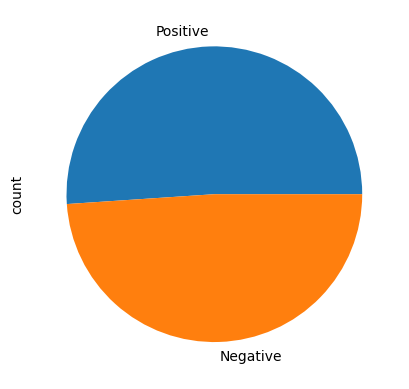

In [32]:
#Plotting pie chart for the Results, for patients whose Age < 45
df[df.loc[:,'Age'] < 45]['Results'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

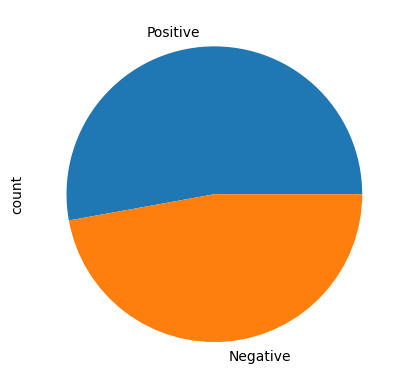

In [33]:
#Plotting pie chart for the Results, for patients whose Age > 45
df[df.loc[:,'Age'] > 45]['Results'].value_counts().plot(kind='pie')


In [34]:
import plotly.express as px

fig = px.histogram(df,x = 'Age',
            title='Age-Disease Distribution',
             color= 'Disease')
fig.update_layout(bargap=0.2)

fig.show()


In [35]:
#Data Transformation
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Results
0,Influenza,Yes,No,Yes,Yes,19.000000,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25.000000,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25.000000,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25.000000,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,46.331412,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,Yes,Yes,No,70.000000,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70.000000,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80.000000,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85.000000,Male,High,High,Positive


In [36]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder
encoder1 = OneHotEncoder(sparse_output=False,drop='first')
encoder2 = LabelEncoder()
df['Disease'] = encoder2.fit_transform(df[['Disease']])
df['Fever'] = encoder1.fit_transform(df[['Fever']])
df['Cough'] =encoder1.fit_transform(df[['Cough']])
df['Fatigue'] = encoder1.fit_transform(df[['Fatigue']])
df['Difficulty Breathing'] =encoder1.fit_transform(df[['Difficulty Breathing']])
df['Gender'] = encoder1.fit_transform(df[['Gender']])
df['Blood Pressure'] = encoder1.fit_transform(df[['Blood Pressure']])
df['Cholesterol Level'] = encoder1.fit_transform(df[['Cholesterol Level']])
df['Results'] = encoder1.fit_transform(df[['Results']])


In [37]:

X = df.drop('Results',axis=1)
Y = df['Results']
from sklearn.preprocessing import MinMaxScaler
mmc = MinMaxScaler()
X = mmc.fit_transform(X)
X

array([[0.48695652, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.20869565, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32173913, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.87826087, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.87826087, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.87826087, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [38]:
# Model Building
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=25)
X_train
X_test
y_train
y_test

93     1.0
203    0.0
141    1.0
99     0.0
151    0.0
190    1.0
46     1.0
109    1.0
75     1.0
336    1.0
86     1.0
180    1.0
195    1.0
51     0.0
112    0.0
200    1.0
313    1.0
5      1.0
140    1.0
168    0.0
114    0.0
258    1.0
36     1.0
65     0.0
15     0.0
262    1.0
238    1.0
309    0.0
22     0.0
281    0.0
321    1.0
272    1.0
229    1.0
21     1.0
214    0.0
327    0.0
226    1.0
27     0.0
8      0.0
63     0.0
117    0.0
54     1.0
232    1.0
235    1.0
160    0.0
320    1.0
245    0.0
301    1.0
246    0.0
167    0.0
225    1.0
173    0.0
318    1.0
134    1.0
96     1.0
215    0.0
136    1.0
1      0.0
340    1.0
130    1.0
Name: Results, dtype: float64

In [39]:
#importing LogisticRegression, DecisionTree, and KNeighbors Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [42]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
dtc = DecisionTreeClassifier(max_depth=6)
knc = KNeighborsClassifier()

In [43]:
#LogisticRegression fitting
lrc.fit(X_train,y_train)
y_pred1= lrc.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7666666666666667
[[19  6]
 [ 8 27]]
0.8181818181818182


In [44]:
#DecisionTree fitting
dtc.fit(X_train,y_train)
y_pred4= dtc.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.7
[[18  7]
 [11 24]]
0.7741935483870968


In [46]:
#KNeighbors fitting
knc.fit(X_train,y_train)
y_pred3= knc.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7
[[16  9]
 [ 9 26]]
0.7428571428571429


In [47]:
#Sequential Model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
8/8 [==============================] - 5s 83ms/step - loss: 0.6965 - accuracy: 0.5083 - val_loss: 0.6755 - val_accuracy: 0.6167
Epoch 2/10
8/8 [==============================] - 0s 18ms/step - loss: 0.6812 - accuracy: 0.6500 - val_loss: 0.6714 - val_accuracy: 0.7333
Epoch 3/10
8/8 [==============================] - 0s 29ms/step - loss: 0.6701 - accuracy: 0.6875 - val_loss: 0.6649 - val_accuracy: 0.7333
Epoch 4/10
8/8 [==============================] - 0s 25ms/step - loss: 0.6605 - accuracy: 0.7542 - val_loss: 0.6516 - val_accuracy: 0.7333
Epoch 5/10
8/8 [==============================] - 0s 25ms/step - loss: 0.6497 - accuracy: 0.7167 - val_loss: 0.6357 - val_accuracy: 0.7500
Epoch 6/10
8/8 [==============================] - 0s 22ms/step - loss: 0.6385 - accuracy: 0.7083 - val_loss: 0.6204 - val_accuracy: 0.7667
Epoch 7/10
8/8 [==============================] - 0s 31ms/step - loss: 0.6287 - accuracy: 0.7167 - val_loss: 0.6078 - val_accuracy: 0.7833
Epoch 8/10
8/8 [===========

In [49]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')

2/2 [==============================] - 0s 16ms/step - loss: 0.5728 - accuracy: 0.8000
Accuracy: 0.800000011920929
